<a href="https://colab.research.google.com/github/jiin-son/credit_card_fraud_detection/blob/main/Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
import seaborn as sns

In [1]:
# Choose the file from directory
from google.colab import files
uploaded = files.upload()

Saving weather_india.csv to weather_india.csv


In [14]:
import io
df = pd.read_csv(io.BytesIO(uploaded['weather_india.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df.head()

,Unnamed: 0,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,0,1901,17.99,19.43,23.49,26.41,28.28,28.60,27.49,26.98,26.26,25.08,21.73,18.95
1,1,1902,19.00,20.39,24.10,26.54,28.68,28.44,27.29,27.05,25.95,24.37,21.33,18.78
2,2,1903,18.32,19.79,22.46,26.03,27.93,28.41,28.04,26.63,26.34,24.57,20.96,18.29
3,3,1904,17.77,19.39,22.95,26.73,27.83,27.85,26.84,26.73,25.84,24.36,21.07,18.84
4,4,1905,17.40,17.79,21.78,24.84,28.32,28.69,27.67,27.47,26.29,26.16,22.07,18.71


In [8]:
# year range
df['YEAR'].describe()
# from 1901 to 2017

count     117.000000
mean     1959.000000
std        33.919021
min      1901.000000
25%      1930.000000
50%      1959.000000
75%      1988.000000
max      2017.000000
Name: YEAR, dtype: float64

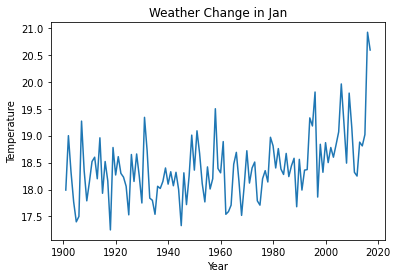

In [9]:
plt.plot(df['YEAR'], df['JAN'])
plt.title('Weather Change in Jan')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.show()

In [15]:
df_reshape = df.reset_index()
df_reshape = pd.melt(df_reshape, id_vars='YEAR', value_vars=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
print(df_reshape)

      YEAR variable  value
0     1901      JAN  17.99
1     1902      JAN  19.00
2     1903      JAN  18.32
3     1904      JAN  17.77
4     1905      JAN  17.40
...    ...      ...    ...
1399  2013      DEC  19.69
1400  2014      DEC  19.50
1401  2015      DEC  20.21
1402  2016      DEC  21.89
1403  2017      DEC  21.47

[1404 rows x 3 columns]


In [18]:
df_reshape['date'] = str(df_reshape['variable']) + '/' + str(df_reshape['YEAR'])
print(df_reshape)

      YEAR variable  value                                               date
0     1901      JAN  17.99  0       JAN\n1       JAN\n2       JAN\n3      ...
1     1902      JAN  19.00  0       JAN\n1       JAN\n2       JAN\n3      ...
2     1903      JAN  18.32  0       JAN\n1       JAN\n2       JAN\n3      ...
3     1904      JAN  17.77  0       JAN\n1       JAN\n2       JAN\n3      ...
4     1905      JAN  17.40  0       JAN\n1       JAN\n2       JAN\n3      ...
...    ...      ...    ...                                                ...
1399  2013      DEC  19.69  0       JAN\n1       JAN\n2       JAN\n3      ...
1400  2014      DEC  19.50  0       JAN\n1       JAN\n2       JAN\n3      ...
1401  2015      DEC  20.21  0       JAN\n1       JAN\n2       JAN\n3      ...
1402  2016      DEC  21.89  0       JAN\n1       JAN\n2       JAN\n3      ...
1403  2017      DEC  21.47  0       JAN\n1       JAN\n2       JAN\n3      ...

[1404 rows x 4 columns]
